Count Genre

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the count of each genre present in IMDB movie dataset?
Print the Genre and number of movies present in that genre.
Note: Ignore the empty value present in genre.
Output Format:
genre_1 num_movie_1
genre_2 num_movie_2

In [10]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')
curr = db.cursor()

In [17]:
sql = '''
SELECT genre, Count(*)
FROM IMDB AS A INNER JOIN genre AS B
ON A.Movie_id = B.Movie_id
WHERE genre != ''
GROUP BY genre
'''

curr.execute(sql)
result = curr.fetchall()
for i in result:
    print(i[0], i[1])

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


In [18]:
db.close()

IMDB Movie
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.
Output Format:
rating


In [19]:
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
curr = db.cursor()

In [26]:
sql = '''
SELECT Title, rating, (B.Domestic + B.Worldwide) as Total
FROM IMDB AS A INNER JOIN earning AS B
ON A.Movie_id = B.Movie_id
ORDER BY 3 DESC
LIMIT 1
'''

curr.execute(sql)
result = curr.fetchall()
for i in result:
    print(i[1])

8.1


In [ ]:
db.close()

## IMDB Voted

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie.
Output Format:
movie_name rating

In [1]:
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
curr = db.cursor()

In [4]:
sql = '''
SELECT Title, rating, TotalVotes
FROM IMDB 
ORDER BY 3 DESC
LIMIT 1
'''

curr.execute(sql)
result = curr.fetchall()
for i in result:
    print(i[0], i[1])

Inception (2010) 8.8


In [ ]:
db.close()

## IMDB running time

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.
Note: Don't print 'min' in running time.
Output Format:
movie_name running_time

In [ ]:
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
curr = db.cursor()

In [8]:
sql = '''
SELECT Title, CAST(Runtime AS INTEGER)
FROM IMDB 
ORDER BY 2 DESC
LIMIT 1
'''

curr.execute(sql)
result = curr.fetchall()
for i in result:
    print(i[0], i[1])

The Wolf of Wall Street (2013) 180


In [ ]:
db.close()

## IMDB profit
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget
Output Format:
movie_name

In [ ]:
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
curr = db.cursor()

In [10]:
sql = '''
SELECT Title, rating, (B.Domestic + B.Worldwide) as NetProfit
FROM IMDB AS A INNER JOIN earning AS B
ON A.Movie_id = B.Movie_id
ORDER BY 3 DESC
LIMIT 1
'''

curr.execute(sql)
result = curr.fetchall()
for i in result:
    print(i[0])

Star Wars: The Force Awakens (2015)


In [ ]:
db.close()

## IMDB least budget

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget
Output Format:
movie_name

In [ ]:
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
curr = db.cursor()

In [14]:
sql = '''
SELECT Title, A.Budget, (B.Domestic + B.Worldwide) as NetProfit
FROM IMDB AS A INNER JOIN earning AS B
ON A.Movie_id = B.Movie_id
ORDER BY 2,3 DESC
LIMIT 1
'''

curr.execute(sql)
result = curr.fetchall()
for i in result:
    print(i[0])

Short Term 12 (2013)


In [21]:
db.close()

## IMDB Year Top

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.
Output Format:
year_1 name_movie_1
year_2 name_movie_2
year_3 name_movie_3

In [22]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')

In [48]:
sql = '''
SELECT Title, SUBSTR(Title, -5, 4) AS Year, (B.Domestic + B.Worldwide) AS NetProfit
FROM IMDB AS A INNER JOIN earning AS B
ON A.Movie_id = B.Movie_id
ORDER BY 2 DESC
'''
df = pd.read_sql_query(sql, db)
idx_mask = df.groupby('Year')['NetProfit'].idxmax()
df_result = df.loc[idx_mask, ['Year', 'Title']]

for idx, row in df_result.iterrows():
    print(row['Year'], row['Title'])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


In [ ]:
db.close()

## IMDB genre budget

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.
Output Format:
genre_1 percent_1
genre_2 percent_2
. . .

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')

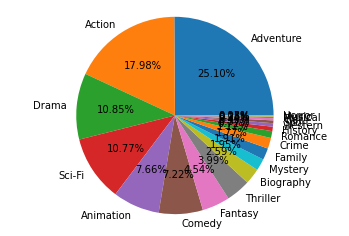

Adventure 25.10
Action 17.98
Drama 10.85
Sci-Fi 10.77
Animation 7.66
Comedy 7.22
Fantasy 4.54
Thriller 3.99
Biography 2.59
Mystery 1.95
Family 1.91
Crime 1.77
Romance 1.12
History 0.72
Western 0.57
Sport 0.46
War 0.36
Musical 0.25
Music 0.15
Horror 0.03


In [5]:
db = sqlite3.connect('IMDB.sqlite')

sql = '''
SELECT B.genre, SUM(A.Budget) AS Budget
FROM IMDB AS A INNER JOIN genre AS B
ON A.Movie_id = B.Movie_id
GROUP BY B.genre
ORDER BY 1 DESC
'''

df = pd.read_sql_query(sql, db)
mask = df.loc[:,'Budget'] == ''
df.loc[mask,'Budget'] = 0

mask = df.loc[:,'genre'] != ''
df = df.loc[mask]

total = df['Budget'].sum()
df['percentage('] = round((df['Budget'] / total) * 100, 2)
df.sort_values(by=['Budget'], ascending=False, inplace = True)

plt.pie(df['Budget'], labels=df['genre'], autopct='%1.2f%%')
plt.axis('equal')
plt.show()

for idx, row in df.iterrows():
    print("{} {:.2f}".format(row[0], row[2]))

In [ ]:
db.close()

## IMDB genre earning
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.
Output Format:
genre_1 percent_1
genre_2 percent_2
. . .

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')

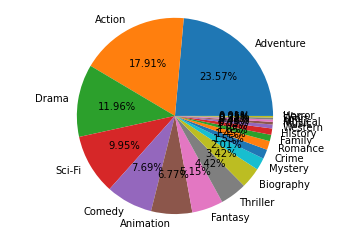

Adventure 23.57
Action 17.91
Drama 11.96
Sci-Fi 9.95
Comedy 7.69
Animation 6.77
Fantasy 5.15
Thriller 4.42
Biography 3.42
Mystery 2.01
Crime 1.55
Romance 1.45
Family 1.05
History 1.04
Western 0.65
Music 0.43
Musical 0.38
Sport 0.32
War 0.25
Horror 0.01


In [11]:
sql = '''
SELECT A.genre, SUM(B.Domestic + B.Worldwide) AS TotalEarning
FROM genre AS A INNER JOIN earning AS B
ON A.Movie_id = B.Movie_id
GROUP BY A.genre
ORDER BY 1 DESC
'''

df = pd.read_sql_query(sql, db)
mask = df.loc[:,'genre'] != ''
df = df.loc[mask]
df.sort_values(by=['TotalEarning'], ascending=False, inplace=True)
total = df['TotalEarning'].sum()
df['percentage'] = round((df['TotalEarning'] / total) * 100, 2)

plt.pie(df['TotalEarning'], labels=df['genre'], autopct='%1.2f%%')
plt.axis('equal')
plt.show()

for idx, row in df.iterrows():
    print("{} {:.2f}".format(row[0], row[2]))
    


## IMDB Specific Genre

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
Print the movie name.
Movies has multiple genre.
Output Format:
movie_name

In [ ]:
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
curr = db.cursor()

In [16]:
sql = '''
SELECT A.Title
FROM IMDB AS A INNER JOIN genre AS B
ON A.Movie_id = B.Movie_id
INNER JOIN genre as C 
ON A.Movie_id = C.Movie_id
WHERE B.genre = 'Sci-Fi' AND C.genre = 'Mystery' AND A.rating>= 8
ORDER BY 1 DESC
'''


curr.execute(sql)
result = curr.fetchall()
for i in result:
    print(i[0])


Arrival (2016)


In [17]:
db.close()